# Task 2: Text Chunking, Embedding, and Vector Store Indexing
## Objective
To understand the structure, balance, and textual characteristics of consumer complaint narratives
and assess their suitability for text-based product classification.

In [11]:
# importning helper libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from langchain_text_splitters import CharacterTextSplitter
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Make plots look nicer
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 5)
sns.set_style("whitegrid")

In [13]:
# loading filterd dataset
df = pd.read_csv('../data/processed/filtered_complaints.csv')

In [59]:
# check the shape of the dataset
df.shape

(579396, 21)

<Axes: xlabel='product_category'>

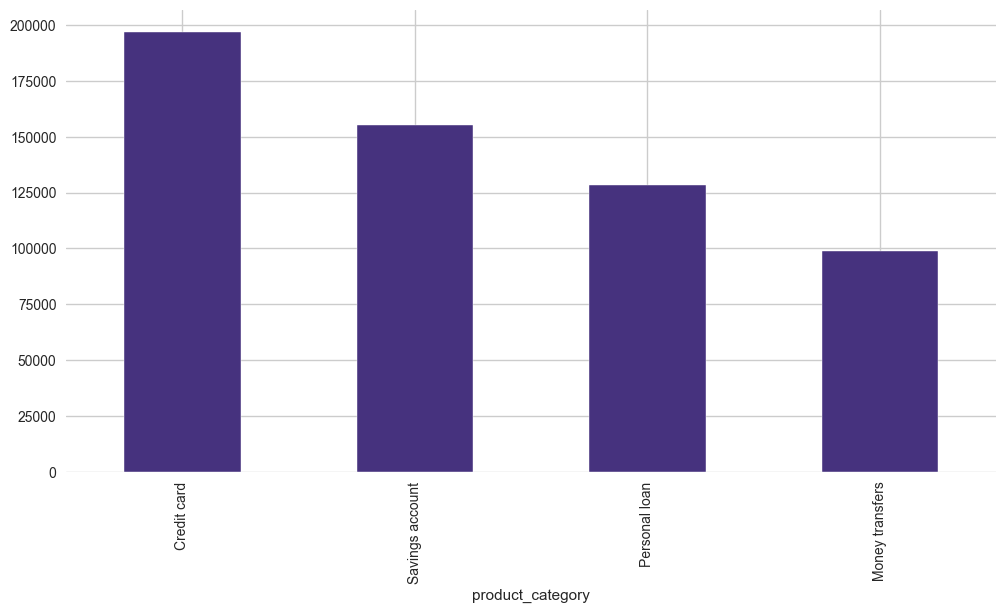

In [60]:
# cheking product category distribution
df['product_category'].value_counts().plot(kind='bar', figsize=(12,6))

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Stratified sampling (12,000 samples)
sample_size = 12000

df_sampled, _ = train_test_split(
    df,
    train_size=sample_size,
    stratify=df["product_category"],
    random_state=42
)

df_sampled["product_category"].value_counts(normalize=True)


product_category
Credit card        0.340250
Savings account    0.267833
Personal loan      0.221583
Money transfers    0.170333
Name: proportion, dtype: float64

“I used stratified sampling to select 12,000 complaints, preserving the original product category distribution to avoid semantic bias during embedding.”

In [15]:
# Text Chunking
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=100
)


In [16]:
documents = []

for _, row in df_sampled.iterrows():
    chunks = text_splitter.split_text(row["Consumer complaint narrative"])
    
    for chunk in chunks:
        documents.append({
            "text": chunk,
            "complaint_id": row["Complaint ID"],
            "product_category": row["product_category"]
        })

len(documents)


41152

### Chunking
We split long complaint narratives into overlapping, fixed-size chunks (chunk_size=500, chunk_overlap=100) so each piece retains enough context for embeddings while keeping token sizes manageable.



In [17]:
# Choosing the Embedding Model
from langchain_huggingface import HuggingFaceEmbeddings
embedding_model = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)

In [19]:
from langchain_core.documents import Document  # Updated import for LangChain 0.2+

langchain_docs = [
    Document(
        page_content=d["text"],
        metadata={
            "complaint_id": d["complaint_id"],
            "product_category": d["product_category"]
        }
    )
    for d in documents
]


In [ ]:
# Create and persist FAISS index

In [ ]:
from langchain_community.vectorstores import FAISS

vector_store = FAISS.from_documents(
    langchain_docs,
    embedding_model
)

vector_store.save_local("../vector_store/faiss_complaints")
